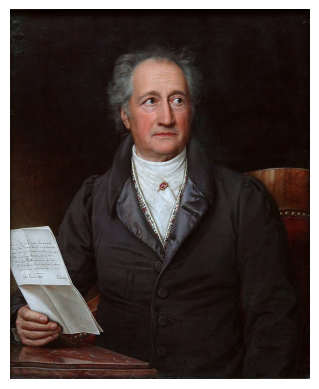

In [68]:
import numpy as np
from matplotlib.image import imread
import matplotlib.pyplot as plt
from PIL import Image

image = imread('Goethe.jpg')
matrix_representation = np.array(image)
plt.imshow(image)
plt.axis('off')
plt.show()


In [69]:
R = matrix_representation[:, :, 0]
G = matrix_representation[:, :, 1]
B = matrix_representation[:, :, 2]

print(matrix_representation.shape)

(789, 640, 3)


In [70]:
# Get the SVD components of each color channel

RU, RS, RVt = np.linalg.svd(R)
GU, GS, GVt = np.linalg.svd(G)
BU, BS, BVt = np.linalg.svd(B)

RSigma = np.zeros((RU.shape[0], RVt.shape[0]))
np.fill_diagonal(RSigma, RS)
GSigma = np.zeros((GU.shape[0], GVt.shape[0]))
np.fill_diagonal(GSigma, GS)
BSigma = np.zeros((BU.shape[0], BVt.shape[0]))
np.fill_diagonal(BSigma, BS)

In [71]:
# We can see here that the norm is zero

R_reconstructed = RU @ RSigma @ RVt
G_reconstructed = GU @ GSigma @ GVt
B_reconstructed = BU @ BSigma @ BVt



# An example using the red color channel
difference_matrix = R - R_reconstructed
frobenius_norm = np.linalg.norm(difference_matrix)

# The difference is zero therefore the matrices are the same
print(f'The frobenius_norm for the red color channel is {frobenius_norm:.2f}')

The frobenius_norm for the red color channel is 0.00


In [72]:
def dim_reduce(A, reduction):
    A[reduction:, reduction:] = 0
    return A

# A little example

little_matrix = np.array([[1, 0, 0, 0], [0, 2, 0, 0], [0, 0, 3, 0], [0, 0, 0, 4]])
reduced_matrix = dim_reduce(little_matrix, 2)

print(little_matrix)
print(reduced_matrix)

[[1 0 0 0]
 [0 2 0 0]
 [0 0 0 0]
 [0 0 0 0]]
[[1 0 0 0]
 [0 2 0 0]
 [0 0 0 0]
 [0 0 0 0]]


In [73]:
reduced_RSigma = dim_reduce(RSigma, 10)
reduced_GSigma = dim_reduce(GSigma, 10)
reduced_BSigma = dim_reduce(BSigma, 10)

R_channel = RU @ reduced_RSigma @ RVt
G_channel = GU @ reduced_GSigma @ GVt
B_channel = BU @ reduced_BSigma @ BVt

principled_matrix = np.stack((R_channel, G_channel, B_channel), axis=-1)

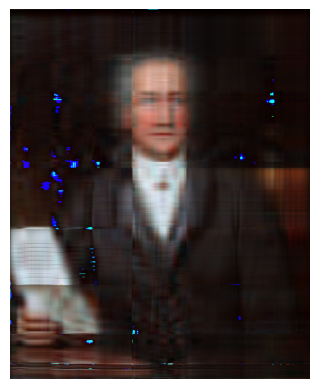

In [77]:
color_image = principled_matrix.astype(np.uint8)
plt.imshow(color_image)
plt.axis('off')
plt.show()

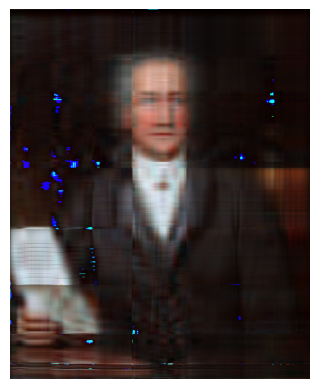

In [79]:
reduced_RSigma = dim_reduce(RSigma, 500)
reduced_GSigma = dim_reduce(GSigma, 500)
reduced_BSigma = dim_reduce(BSigma, 500)

R_channel = RU @ reduced_RSigma @ RVt
G_channel = GU @ reduced_GSigma @ GVt
B_channel = BU @ reduced_BSigma @ BVt

principled_matrix = np.stack((R_channel, G_channel, B_channel), axis=-1)

color_image = principled_matrix.astype(np.uint8)
plt.imshow(color_image)
plt.axis('off')
plt.show()

In [88]:
# File Size Comparison

image = imread('Goethe.jpg')
matrix_representation = np.array(image)
matrix_representation.shape

file_size = 3 * (789^2 + 640^2 + 640*789) * 8
print(f'The uncompressed matrix has {file_size} bytes')

r = 10
compressed_size = 3 * r * (789 + 640 + r) * 8

print(f'The uncompressed matrix has {compressed_size} bytes')
print(f'Total reduction of {100 * (1 - compressed_size / file_size):.2f}%')



The uncompressed matrix has 12122616 bytes
The uncompressed matrix has 345360 bytes
Total reduction of 97.15%


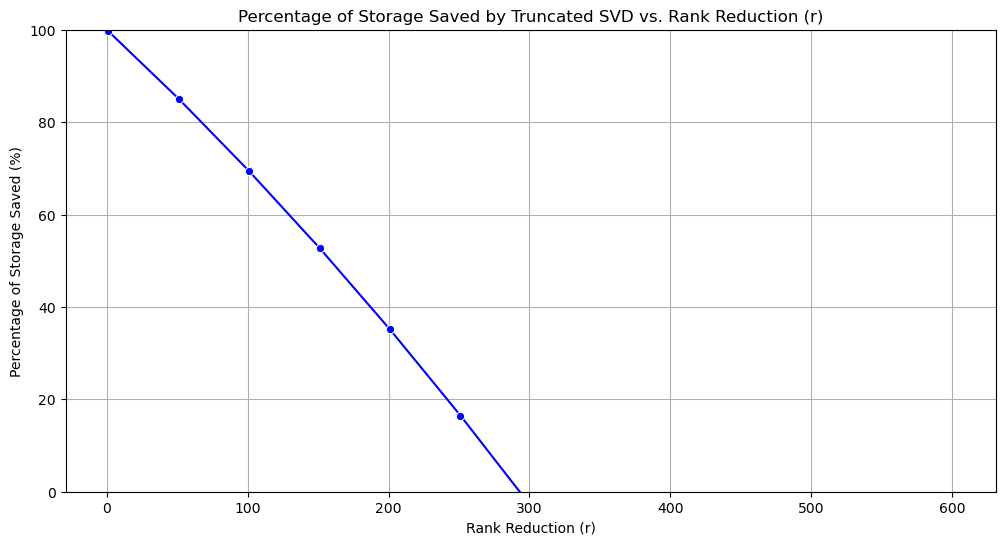

In [90]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

n, m = 789, 640

r_values = np.arange(1, min(n, m), 50)

# A general formula
original_storage = n * m 
svd_storage = (n * r_values) + (r_values ** 2) + (m * r_values)
percentage_saved = 100 * (1 - (svd_storage / original_storage))


plt.figure(figsize=(12, 6))
sns.lineplot(x=r_values, y=percentage_saved, marker='o', color='blue')

plt.title("Percentage of Storage Saved by Truncated SVD vs. Rank Reduction (r)")
plt.xlabel("Rank Reduction (r)")
plt.ylabel("Percentage of Storage Saved (%)")
plt.ylim(0, 100)
plt.grid(True)

plt.show()